[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/floleuerer/ml-tutorials/blob/main/01_fastai_pets.ipynb)

# Vorbereitungen

Wenn du ein Notebook in Google Colab öffnest, musst du den "Laufzeit-Typen" den Instanz auf "GPU" ändern. Damit bekommst die Instanz eine GPU zugewiesen und das Training ist deutlich schneller. 

Menü "Laufzeit" -> "Laufzeittyp ändern"

![Runtime Type](imgs/01_runtime_type.png)

Im Pop-Up den Hardwarebeschleuniger auf "GPU" ändern und "Speichern".

![Runtime Type](imgs/02_runtime_type_gpu.png)

Die Instanz wird jetzt neu geladen und du musst alle Zellen noch einmal ausführen!

Python-Pakete von [fast.ai](https://www.fast.ai) installieren und importieren.

In [ ]:
!pip install -Uq fastai==2.0.18

     |████████████████████████████████| 194kB 10.2MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *

**Wichtig!** Wenn die folgende Zelle "False" ausgibt, ist keine GPU vorhanden -> Bitte prüfe die o. g. Schritte noch einmal und starte ggf. das Notebook neu. Bei "True" hast du eine GPU-Instanz und kannst weiter machen.

In [ ]:
torch.cuda.is_available()

True

# Daten laden

Fast.ai liefert verschiedene Standard-Datensets mit, die häufig für DeepLearning-Benchmarks verwendet werden. Das gebräuchlichste ist das PETS-Dataset. Es besteht aus 37 verschiedenen Hunde- und Katzenrassen und umfasst insgesamt ca. 7400 Bilder.

Datensatz herunterladen und den Pfad als `path`-Variable speichern. Anschlißend die Bilderpfade als `files`-Liste laden.

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_161.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_65.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_75.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_148.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_90.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_250.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_59.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_63.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_155.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_73.jpg')...]

In [ ]:
files = get_image_files(path/"images")
len(files)

7390

Jupyter Notebooks unterstützt die Anzeige von Bildern. Dazu  müssen wir mit `PILImage.create` ein Bild-Objekt (Variable `img`) erstellen und zeigen es an. Um ein anderes Bild anzuzeigen, kannst du die Varible `img_number` ändern und die Zelle erneut ausführen.

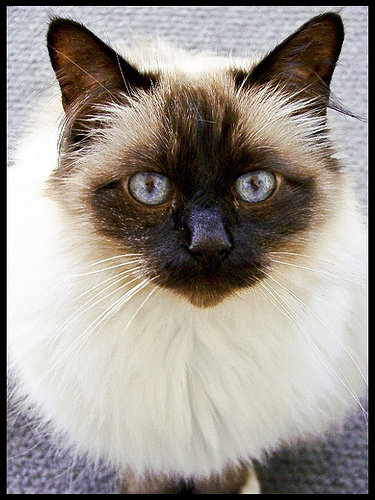

In [ ]:
img_number = 7
img = PILImage.create(files[img_number])
img

# Cats-vs-Dogs

Als einfachstes Modell trainieren wir einen Cats-vs-Dogs Classifier. D.h. das Modell wird trainiert um zwischen Hunden und Katzen zu unterscheiden. Dazu machen wir uns zur Nutze, dass die Katzenbilder mit einen Großbuchstaben beginnen (Egyptian_Mau_167.jpg) und die Hundebilder mit kleinbuchstaben (shiba_inu_136.jpg).

In [ ]:
def label_func(f): return 'Cat' if f[0].isupper() else 'Dog'

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

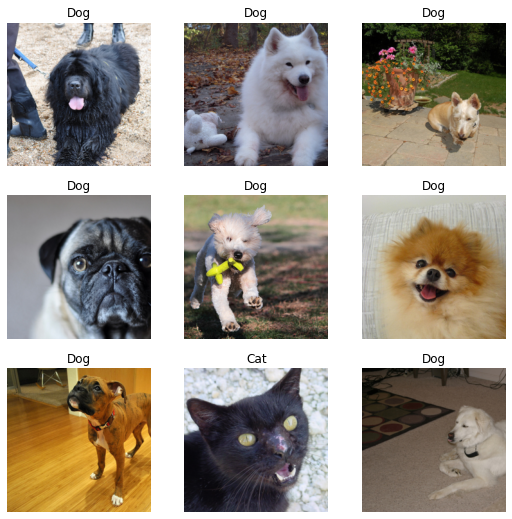

In [ ]:
dls.show_batch()

Deep Learning Modell verarbeiten die Daten in Batches. D. h. die Bilder werden nicht einzeln, sondern 64 (die Standard Batch-Size) Bilder werden zu einem Batch zusammengefasst.

Mit `dls.one_batch()` laden wir einen Batch und zeigen uns die `shape` an. 

**(Batch-Size, Channels (rot, grün, blau), Höhe, Breite)**

In [ ]:
batch = dls.one_batch()
batch[0].shape

torch.Size([64, 3, 224, 224])

In [ ]:
batch[0]

TensorImage([[[[0.5176, 0.5216, 0.5176,  ..., 0.4549, 0.4627, 0.4667],
          [0.5176, 0.5176, 0.5176,  ..., 0.4588, 0.4588, 0.4627],
          [0.5176, 0.5137, 0.5137,  ..., 0.4627, 0.4627, 0.4549],
          ...,
          [0.0824, 0.0941, 0.1333,  ..., 0.2196, 0.2118, 0.2157],
          [0.0863, 0.1451, 0.1804,  ..., 0.2118, 0.2039, 0.2078],
          [0.1451, 0.1373, 0.1804,  ..., 0.2039, 0.2078, 0.2275]],

         [[0.5333, 0.5373, 0.5373,  ..., 0.5020, 0.5059, 0.5137],
          [0.5333, 0.5333, 0.5333,  ..., 0.5020, 0.5020, 0.5059],
          [0.5294, 0.5294, 0.5294,  ..., 0.5059, 0.5020, 0.5020],
          ...,
          [0.0824, 0.0902, 0.1255,  ..., 0.3216, 0.3176, 0.3176],
          [0.0863, 0.1412, 0.1725,  ..., 0.3137, 0.3098, 0.3137],
          [0.1490, 0.1255, 0.1725,  ..., 0.3059, 0.3098, 0.3333]],

         [[0.5294, 0.5333, 0.5216,  ..., 0.5098, 0.5137, 0.5137],
          [0.5294, 0.5294, 0.5255,  ..., 0.5098, 0.5098, 0.5098],
          [0.5255, 0.5255, 0.5255,  .

# Modell trainieren

Wir trainieren ein Resnet34-Modell - genauer gesagt nehmen wir ein "Pretrained"-Modell und Fine-tunen es.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.146832,0.032258,0.010149,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.042801,0.040671,0.010825,00:53


# Ergebnisse anzeigen

`learn.show_results()` zeigt Beispielbilder und deren Klassifizierung an (rot bedeutet, dass das Modell das Bild falsch klassifiziert hat).

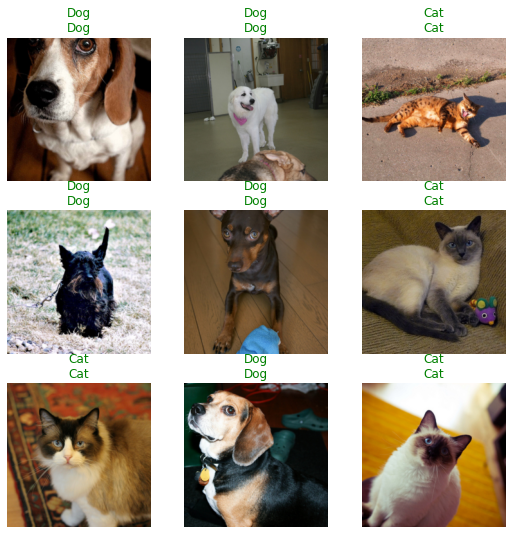

In [ ]:
learn.show_results()

`learn.predict()` gibt eine Prognose zu einem übergebenen Bild.



In [ ]:
img_to_predict = files[1337]
learn.predict(img_to_predict)

('Dog', tensor(1), tensor([8.0328e-06, 9.9999e-01]))

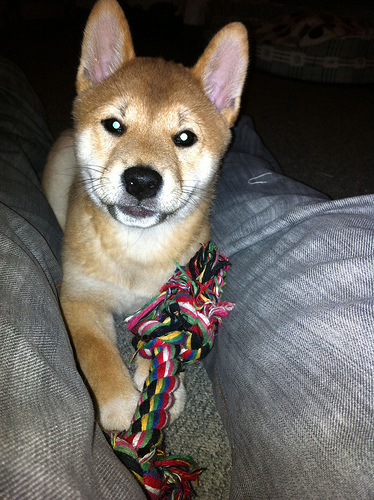

In [ ]:
PILImage.create(img_to_predict)